# Module 7 Assignment 1 - Digit Recognizer 

Jonathan Sax <br>
Northwestern University<br>
Practical Machine Learning - MSDS 422<br>
5/15/2022 

## Background Materials

The classic MNIST Digit Recognizer (https://www.kaggle.com/competitions/digit-recognizer) problem is a competition on Kaggle.com, and you will compete in this competition. For this assignment, you will develop a classifier that may be used to predict which of the 10 digits is being written.

## Requirements

- Conduct your analysis using a cross-validation design.
- Conduct / refine EDA.
- Conduct Design of Experiments to evaluate the performance of various neural networks by changing the layers and nodes. Tested neural network structures should be explored within a benchmark experiment, a 2x2 completely crossed design. An example of a completely crossed designed with {2, 5} layers and {10,20} nodes follows.

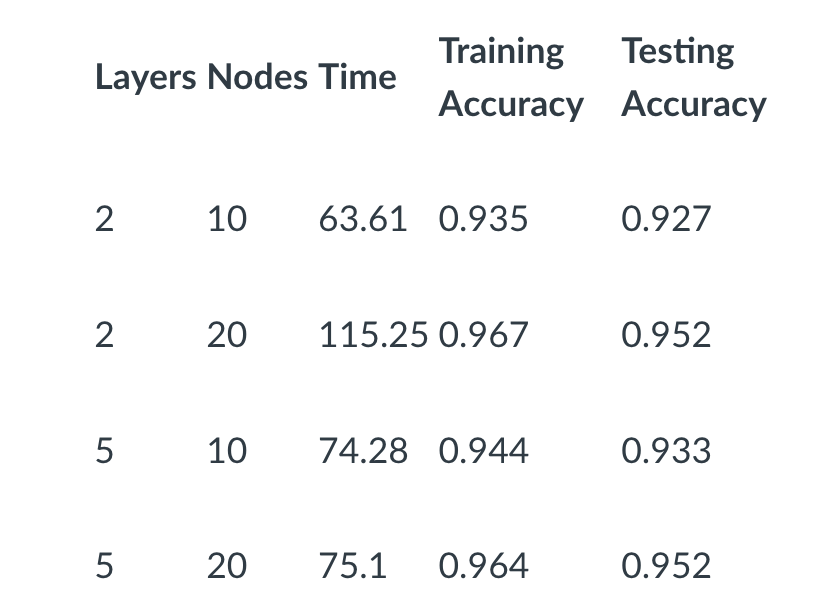

- Due to the time required to fit each neural network, we will observe only one trial for each cell in the design. 
- You will build your models on csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial. 
- Evaluate goodness of fit metrics on the training and validation sets.
- Provide a multi-class confusion matrix.
- Discuss how your models performed.

In summary, this assignment asks you to fit a number of neural networks, comparing processing time and performance across experimental treatments. Processing time will be recorded for the fitting on the train.csv. Kaggle.com accuracy scores will be reported for all benchmarks.  

## Ingest

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator



In [16]:
test = pd.read_csv("test.csv")
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
train = pd.read_csv("train.csv")
train.shape

(42000, 785)

## EDA

In [29]:
train_df_X = train.copy()
train_df_y = train_df_X['label']
train_df_X.drop(['label'], axis=1, inplace=True)

In [30]:
train_df_X.shape

(42000, 784)

In [31]:
train_df_y.shape

(42000,)

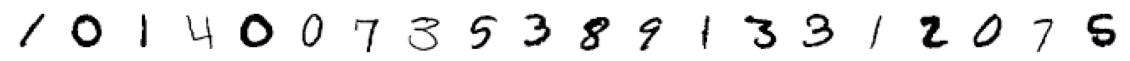

In [32]:
# 784 features pixels for each sample
# each sample represents a 28x28 image of a digit, need to reshape
train_df_X_img = train_df_X.values.reshape(-1,28,28,1)

num_examples = 20
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(train_df_X_img[i], cmap='Greys')
    plt.axis('off')
plt.show()



Text(0.5, 1.0, 'Digit Distribution - Training Set')

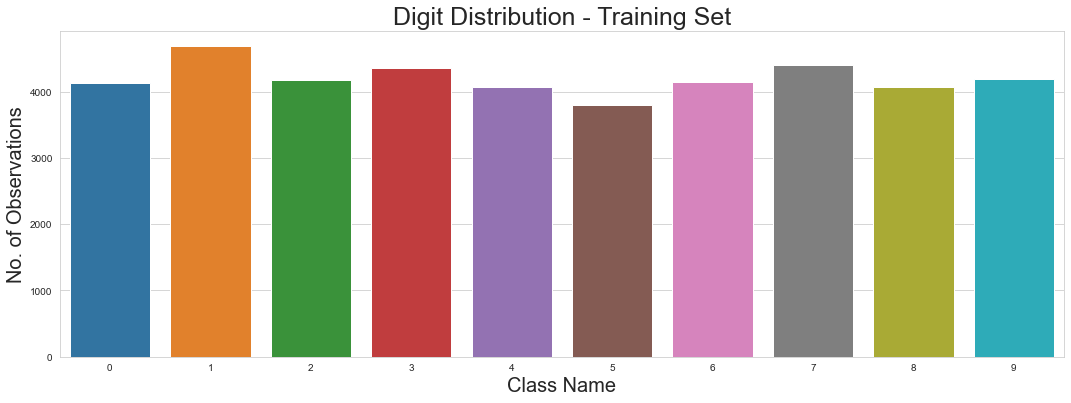

In [33]:
ax = plt.subplots(figsize=(18, 6))
sns.set_style("whitegrid")
sns.countplot(x='label', data=train);
plt.ylabel("No. of Observations", size=20);
plt.xlabel("Class Name", size=20);
plt.title("Digit Distribution - Training Set", size=25)

In [34]:
X_test_csv = test.values

In [35]:
X_test_csv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Modeling

In [36]:
X_train,X_val,y_train,y_val=train_test_split(train_df_X,train_df_y,test_size=0.2,random_state=42)

### Random Forest Classifier

In [106]:
start=datetime.now()
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train,y_train)
end=datetime.now()
print(end-start)

0:00:17.973666


In [107]:
start=datetime.now()
y_pred = rfc_model.predict(X_val)
end=datetime.now()
print(end-start)
print('accuracy score = ', accuracy_score(y_val,y_pred))

0:00:00.285560
accuracy score =  0.9628571428571429


In [108]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



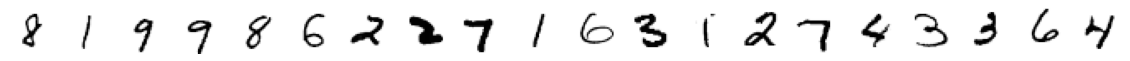

In [109]:
X_val_img = X_val.values.reshape(-1,28,28,1)

num_examples = 20
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_val_img[i], cmap='Greys')
    plt.axis('off')
plt.show()

In [110]:
y_pred[0:20]


array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4])

In [111]:
y_val[0:20]

5457     8
38509    1
25536    9
31803    9
39863    8
30639    6
12986    2
41067    2
30743    7
6839     1
17164    6
21723    3
12272    1
5030     2
25222    7
34680    4
4976     3
19565    3
27947    6
31133    4
Name: label, dtype: int64

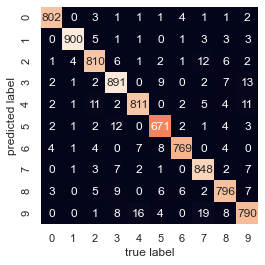

In [112]:
mat = confusion_matrix(y_val, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [113]:
start=datetime.now()
y = rfc_model.predict(test)
end=datetime.now()
print(end-start)

0:00:00.991360


In [60]:
# create submission file
submission = pd.DataFrame({"ImageId": (test.index + 1),"Label": y})
submission.to_csv('submissionRFC.csv', index=False)

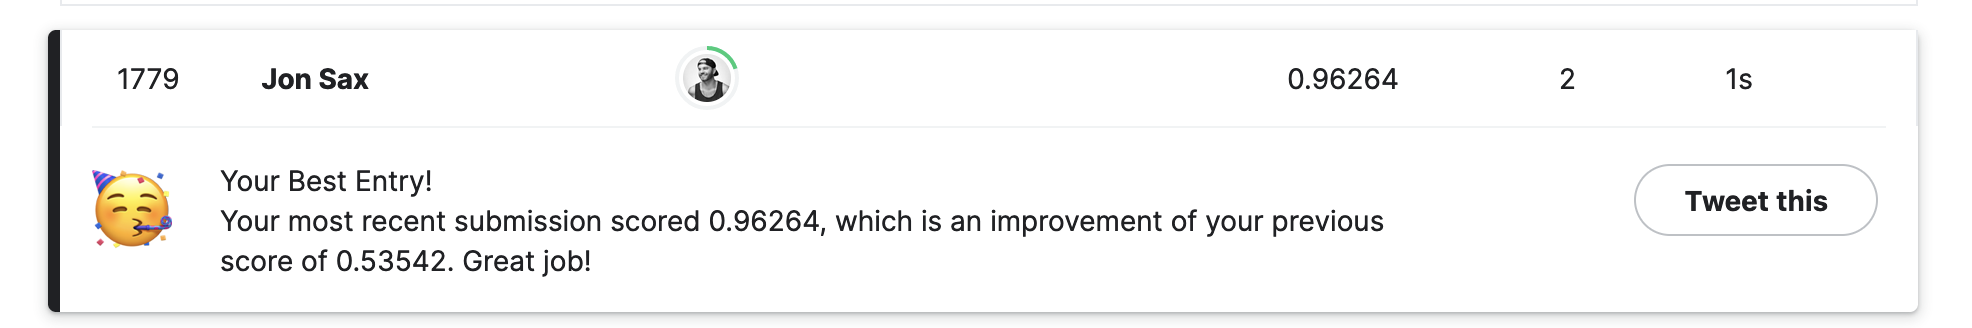

Kaggle username = jonsax88

## Principal Component Analysis (PCA)

In [62]:
start=datetime.now()
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
pca_n_components = np.argmax(cumsum >= 0.95) + 1
end=datetime.now()
print('Time: ', end-start)
print('# PCA Components at 95% variability: ', pca_n_components)

Time:  0:00:02.004420
# PCA Components at 95% variability:  153


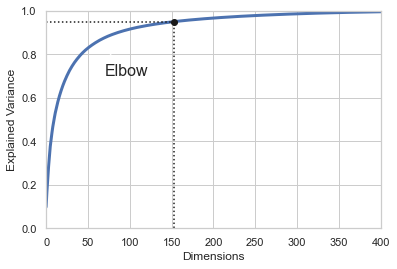

In [63]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([pca_n_components, pca_n_components], [0, 0.95], "k:")
plt.plot([0, pca_n_components], [0.95, 0.95], "k:")
plt.plot(pca_n_components, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [64]:
start=datetime.now()
pca = PCA(n_components=pca_n_components)
X_train_pca = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_train_pca)
end=datetime.now()
print('Time: ', end-start)

Time:  0:00:02.075423


## PCA of test and train dataset combined

In [65]:
rnd_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

start=datetime.now()
rnd_clf_pca.fit(X_train_pca, y_train)
end=datetime.now()
print(end-start)



0:00:36.787805


In [73]:
X_test_reduced = pca.transform(X_val)

y_pred_reduced = rnd_clf_pca.predict(X_test_reduced)
accuracy_score(y_val, y_pred_reduced)

0.9380952380952381

In [78]:
X_test_reduced_csv = pca.transform(X_test_csv)
y_pred_reduced_csv = rnd_clf_pca.predict(X_test_reduced_csv)

In [80]:
# create submission file
submission2 = pd.DataFrame({"ImageId": (test.index + 1),"Label": y_pred_reduced_csv})
submission2.to_csv('submission_pcs_rf.csv', index=False)

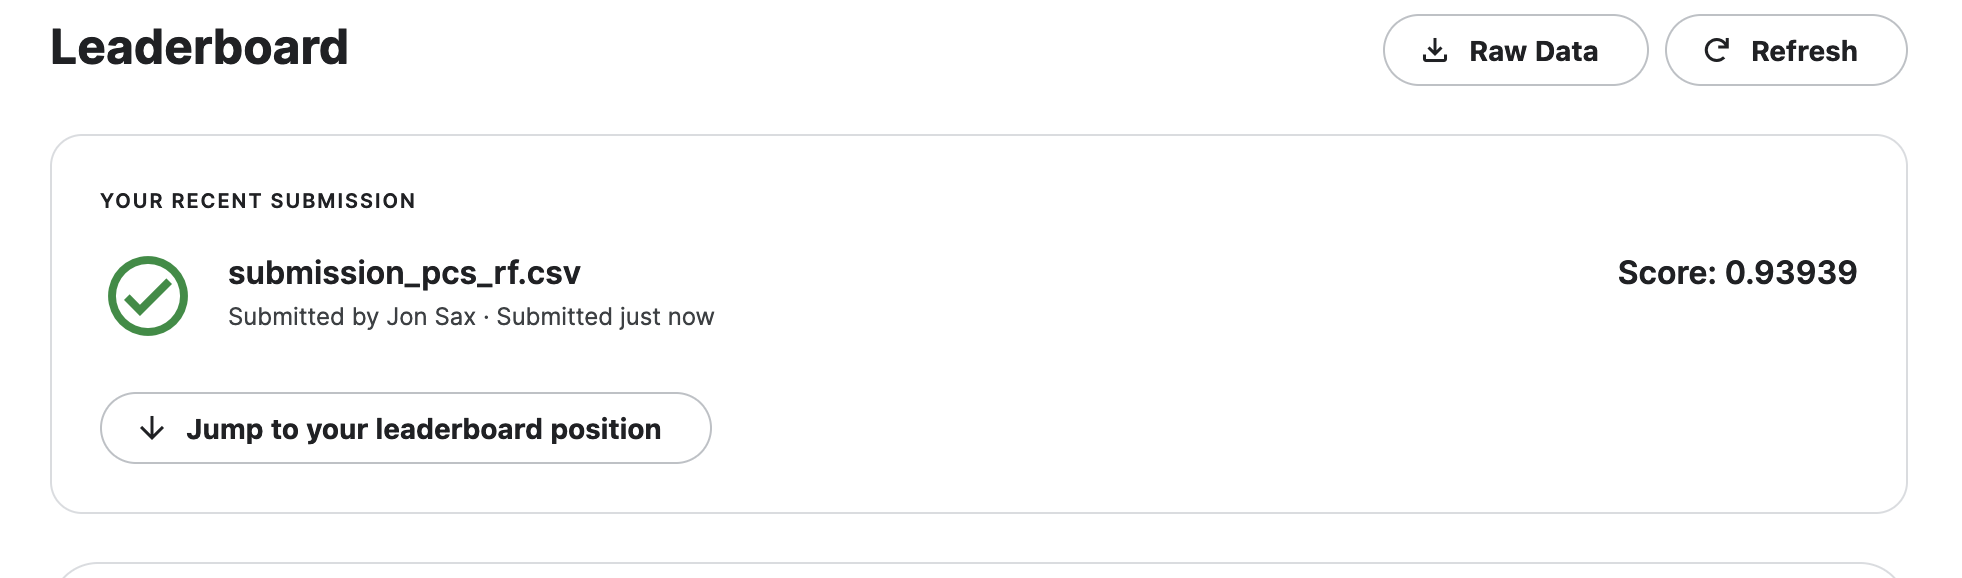

## K-Means Clustering

In [32]:
n_digits = len(np.unique(y_val))
print(n_digits)

10


In [41]:
start=datetime.now()

# Initialize Kmeans model

kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data

kmeans.fit(X_train)

kmeans.labels_

end=datetime.now()
print(end-start)


0:00:00.625563


In [42]:
y_train_clusters = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
y_train_clusters['Label'] = y_train.tolist()
y_train_clusters

,Cluster,Label
0,4,6
1,0,5
2,9,3
3,3,4
4,3,7
...,...,...
33595,5,9
33596,3,9
33597,6,2
33598,4,6


In [43]:
pd.crosstab(y_train_clusters['Cluster'],y_train_clusters["Label"])

Label,0,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,,
0,31,10,80,474,5,719,14,4,1805,46
1,7,967,1842,165,55,122,65,109,450,22
2,1150,0,631,219,13,276,109,7,107,15
3,8,4,26,78,946,131,0,1521,39,1501
4,146,6,132,47,73,101,2314,2,29,7
5,7,6,32,30,912,392,1,1505,196,1032
6,53,3,246,27,1143,73,673,190,53,592
7,6,2775,196,214,85,310,123,162,184,95
8,1811,0,8,5,0,23,42,4,13,10


In [44]:
key = y_train_clusters.groupby('Cluster').agg(lambda x:x.value_counts().index[0])
key 

,Label
Cluster,
0,8
1,2
2,0
3,7
4,6
5,7
6,4
7,1
8,0


In [45]:
y_train_labels = []
for i in range(0,len(kmeans.labels_)):
    x = kmeans.labels_[i]
    y_train_labels += [key['Label'].loc[x]]

print(classification_report(y_train, y_train_labels))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76      3316
           1       0.67      0.74      0.70      3775
           2       0.48      0.55      0.52      3331
           3       0.58      0.63      0.60      3414
           4       0.37      0.35      0.36      3233
           5       0.00      0.00      0.00      3093
           6       0.81      0.69      0.75      3352
           7       0.36      0.86      0.51      3508
           8       0.57      0.56      0.56      3228
           9       0.00      0.00      0.00      3350

    accuracy                           0.54     33600
   macro avg       0.45      0.53      0.48     33600
weighted avg       0.46      0.54      0.48     33600



/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
y_val_pred = kmeans.predict(X_val)
y_val_pred

array([1, 7, 3, ..., 9, 8, 3], dtype=int32)

In [47]:
y_val_labels = []
for i in range(0,len(y_val_pred)):
    x = y_val_pred[i]
    y_val_labels += [key['Label'].loc[x]]

print(classification_report(y_val, y_val_labels))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       816
           1       0.68      0.77      0.72       909
           2       0.49      0.54      0.51       846
           3       0.61      0.64      0.63       937
           4       0.38      0.34      0.36       839
           5       0.00      0.00      0.00       702
           6       0.79      0.67      0.72       785
           7       0.37      0.89      0.52       893
           8       0.60      0.57      0.58       835
           9       0.00      0.00      0.00       838

    accuracy                           0.54      8400
   macro avg       0.46      0.53      0.48      8400
weighted avg       0.47      0.54      0.49      8400



/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hydraulicdecoy/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
Kmeans_pred = kmeans.predict(test)

test_labels = []
for i in range(0,len(Kmeans_pred)):
    x = Kmeans_pred[i]
    test_labels += [key['Label'].loc[x]]

In [51]:
# create submission file
submission = pd.DataFrame({"ImageId": (test.index + 1),"Label": test_labels})
submission.to_csv('submission.csv', index=False)

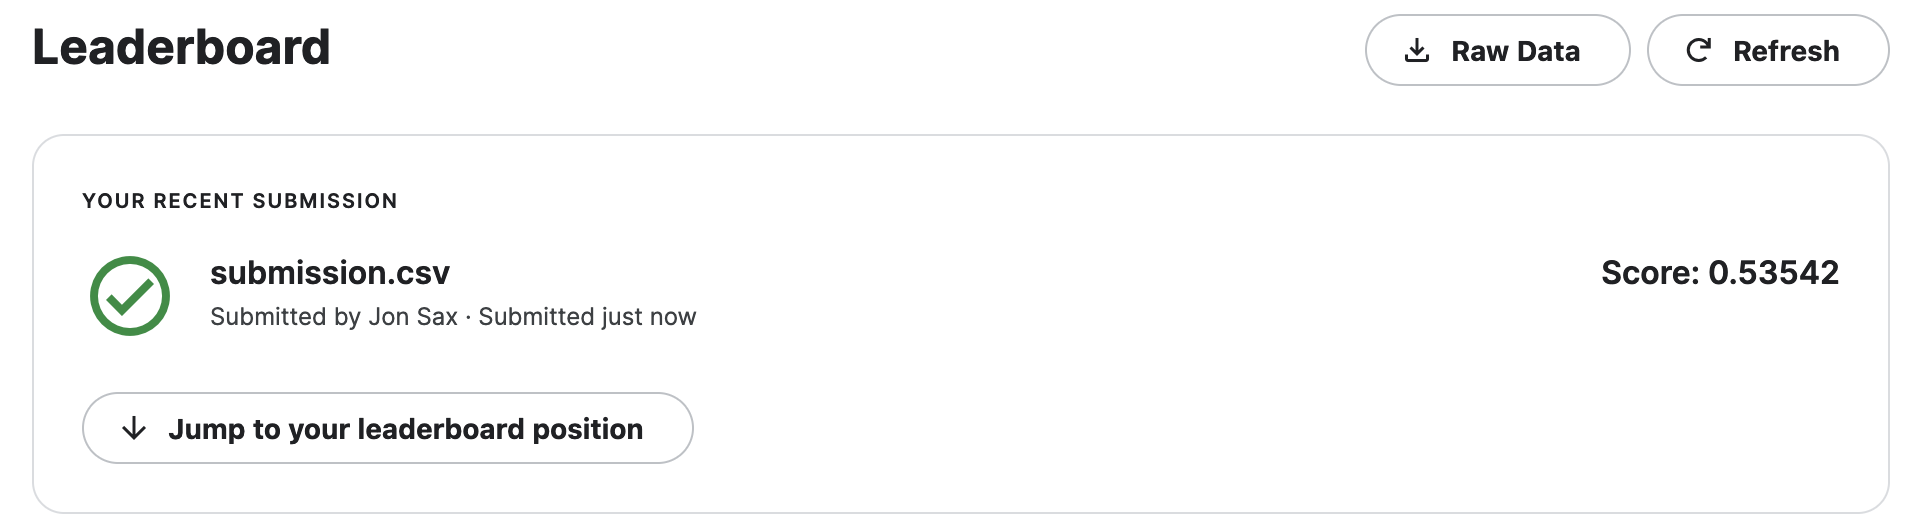

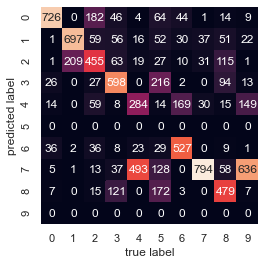

In [81]:
mat2 = confusion_matrix(y_val, y_val_labels)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Artificial Neural Network (ANN)

In [24]:
# https://www.kaggle.com/code/prashant111/comprehensive-guide-to-ann-with-keras

In [51]:
# load dataset
from keras.datasets import mnist


# split dataset into training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


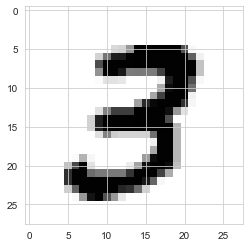

In [52]:
# Display images

import matplotlib.pyplot as plt
plt.imshow(x_train[7], cmap=plt.cm.binary)

In [56]:
# View the dimension of tensor

print(x_train.shape)

# View the data type of tensor

print(x_train.dtype)

(60000, 28, 28)
uint8


In [57]:
# scale the input values to type float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [58]:
# scale the input values within the interval [0, 1]

x_train /= 255
x_test /= 255

In [59]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [60]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [72]:
from tensorflow.keras.utils import to_categorical

In [73]:
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)


7
5
(60000,)
(10000, 784)


In [74]:
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [76]:
print(y_test[0])


print(y_train[0])

print(y_test.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)


In [77]:
# Define the model

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax')) # 2nd layer is a softmax layer of 10 neurons, which means that it will return a matrix of 10 probability values representing the 10 possible digits.

# the neural network has been defined as a sequence of two layers that are densely connected (or fully connected)
# all the neurons in each layer are connected to all the neurons in the next layer

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Compile model with the compile() method.

- Starting with the Sequential model, we can define the layers in a simple way with add() method.
- the next step is to compile the model with the compile() method, with which we can specify some properties through method arguments are as follows:

- the first argument is the *loss function*.
- the second argument is the *optimizer*.
- the third argument is the *metrics*.

In this example we specify that the -

- loss function is categorical_crossentropy,
- the optimizer used is the stocastic gradient descent (sgd), and
- the metric is accuracy, with which we will evaluate the percentage of correct guesses.


In [79]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [80]:
# Train the model with the fit() method

model.fit(x_train, y_train, batch_size=100, epochs=10)



Epoch 1/10
600/600 [==============================] - 1s 977us/step - loss: 2.1799 - accuracy: 0.3180
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 1.8895 - accuracy: 0.5920
Epoch 3/10
600/600 [==============================] - 1s 913us/step - loss: 1.6450 - accuracy: 0.6430
Epoch 4/10
600/600 [==============================] - 1s 892us/step - loss: 1.4412 - accuracy: 0.6854
Epoch 5/10
600/600 [==============================] - 1s 970us/step - loss: 1.2764 - accuracy: 0.7196
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 1.1444 - accuracy: 0.7481
Epoch 7/10
600/600 [==============================] - 1s 878us/step - loss: 1.0379 - accuracy: 0.7739
Epoch 8/10
600/600 [==============================] - 1s 879us/step - loss: 0.9512 - accuracy: 0.7968
Epoch 9/10
600/600 [==============================] - 1s 880us/step - loss: 0.8799 - accuracy: 0.8118
Epoch 10/10
600/600 [==============================] - 1s 952us/step - loss: 0.8205 - 

In [81]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 708us/step - loss: 0.7780 - accuracy: 0.8368


In [82]:
# Accuracy of the model


print('Test accuracy:', round(test_acc,4))



Test accuracy: 0.8368


In [85]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

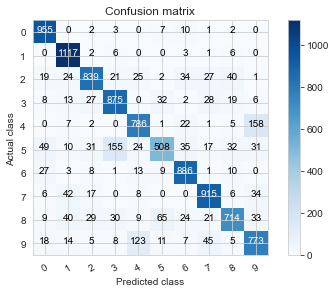

In [86]:


from collections import Counter
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))



## Conclusion